In [2]:
!pip install torch torchvision torchaudio

  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached numpy-1.23.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached certifi-2022.9.24-py3-none-any.whl (161 kB)


You should consider upgrading via the 'C:\Users\Aaditya\PycharmProjects\pythonProject6\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
!pip install stable-baselines3[extra] protobuf==3.20.*

In [1]:
!pip list

Package                    Version
-------------------------- -----------
absl-py                    1.3.0
ale-py                     0.7.5
anyio                      3.6.2
argon2-cffi                21.3.0
argon2-cffi-bindings       21.2.0
asttokens                  2.1.0
attrs                      22.1.0
AutoROM                    0.4.2
AutoROM.accept-rom-license 0.4.2
backcall                   0.2.0
beautifulsoup4             4.11.1
bleach                     5.0.1
cachetools                 5.2.0
certifi                    2022.9.24
cffi                       1.15.1
charset-normalizer         2.1.1
click                      8.1.3
cloudpickle                2.2.0
colorama                   0.4.6
contourpy                  1.0.6
cycler                     0.11.0
debugpy                    1.6.3
decorator                  5.1.1
defusedxml                 0.7.1
entrypoints                0.4
executing                  1.2.0
fastjsonschema             2.16.2
fonttools                 

You should consider upgrading via the 'C:\Users\Aaditya\PycharmProjects\pythonProject6\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install pydirectinput mss

You should consider upgrading via the 'C:\Users\Aaditya\PycharmProjects\pythonProject6\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install pytesseract

You should consider upgrading via the 'C:\Users\Aaditya\PycharmProjects\pythonProject6\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [77]:
from mss import mss
import numpy as np
from matplotlib import pyplot as plt
import time
import cv2
import pydirectinput
import pytesseract
pytesseract.pytesseract.tesseract_cmd = \
r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from gym import Env
from gym.spaces import Box, Discrete

In [78]:
class WebGame(Env):
    def __init__(self):
        super().__init__()
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(3)
        self.cap = mss()
        self.game_location = {'top':300, 'left':0, 'width':600, 'height':500}
        self.done_location = {'top':405, 'left':630, 'width':660, 'height':70}


    def step(self, action):
        # Action key : 0 = Space, 1 = Duck, 2 = No Action
        pass
    def render(self):
        pass
    def reset(self):
        pass
    def close(self):
        pass
    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3]
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (100,83))
        channel = np.reshape(resized, (1,83,100))
        return channel
    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))[:,:,:3]
        done_strings = ['GAME','GAHE']
        done = False
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        return done, done_cap

In [79]:
env = WebGame()

In [44]:
env.get_observation().shape

(1, 83, 100)

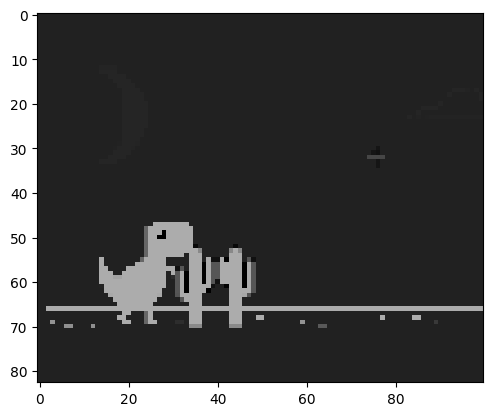

In [49]:
plt.imshow(cv2.cvtColor((env.get_observation()[0]),cv2.COLOR_BGR2RGB))

In [82]:
done, done_cap = env.get_done()

In [83]:
done

True